In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [2]:
data = pd.read_csv(r"C:\Users\halwa\OneDrive\Desktop\Algo\data. csv")

In [3]:
data

,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr)
0,30-Sep-2021,17718.90,17742.15,17585.35,17618.15,378592721,27167.19
1,01-Oct-2021,17531.90,17557.15,17452.90,17532.05,305763919,20911.61
2,04-Oct-2021,17615.55,17750.90,17581.35,17691.25,295761839,21343.51
3,05-Oct-2021,17661.35,17833.45,17640.90,17822.30,427000191,23066.80
4,06-Oct-2021,17861.50,17884.60,17613.15,17646.00,395833550,24504.30
...,...,...,...,...,...,...,...
224,25-Aug-2022,17679.00,17726.50,17487.45,17522.45,230181848,17566.70
225,26-Aug-2022,17619.30,17685.85,17519.35,17558.90,266636238,17500.80
226,29-Aug-2022,17188.65,17380.15,17166.20,17312.90,244854637,19351.50
227,30-Aug-2022,17414.95,17777.65,17401.50,17759.30,324687477,26284.26


In [4]:
data = data.set_index(pd.DatetimeIndex(data['Date'].values))

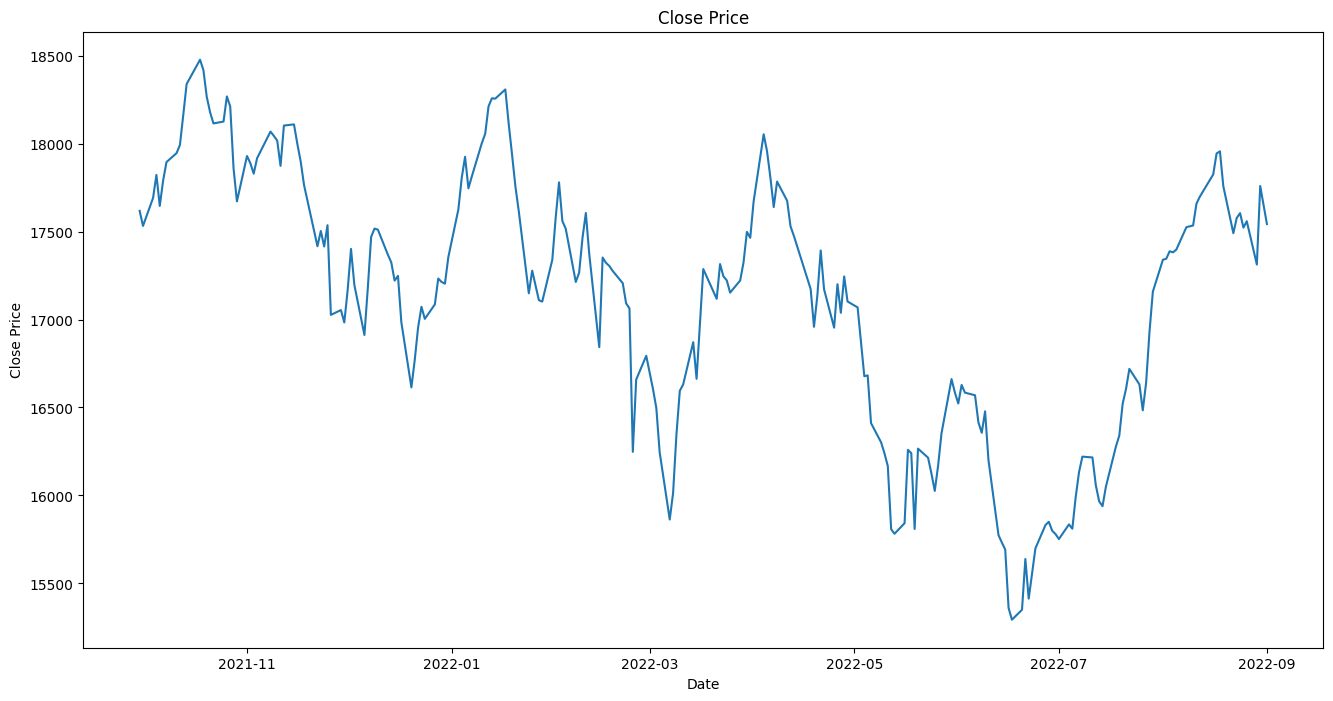

In [5]:
plt.figure(figsize=(16,8))
plt.title('Close Price')
plt.plot(data['Close'])
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

In [6]:
def MovingAvg(data, period  = 10, column = 'Close'):
    return data[column].rolling(window = period).mean()

In [7]:
data['Moving Average'] = MovingAvg(data)

In [8]:
data

,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr),Moving Average
2021-09-30,30-Sep-2021,17718.90,17742.15,17585.35,17618.15,378592721,27167.19,NaN
2021-10-01,01-Oct-2021,17531.90,17557.15,17452.90,17532.05,305763919,20911.61,NaN
2021-10-04,04-Oct-2021,17615.55,17750.90,17581.35,17691.25,295761839,21343.51,NaN
2021-10-05,05-Oct-2021,17661.35,17833.45,17640.90,17822.30,427000191,23066.80,NaN
2021-10-06,06-Oct-2021,17861.50,17884.60,17613.15,17646.00,395833550,24504.30,NaN
...,...,...,...,...,...,...,...,...
2022-08-25,25-Aug-2022,17679.00,17726.50,17487.45,17522.45,230181848,17566.70,17703.720
2022-08-26,26-Aug-2022,17619.30,17685.85,17519.35,17558.90,266636238,17500.80,17693.710
2022-08-29,29-Aug-2022,17188.65,17380.15,17166.20,17312.90,244854637,19351.50,17655.185
2022-08-30,30-Aug-2022,17414.95,17777.65,17401.50,17759.30,324687477,26284.26,17648.590


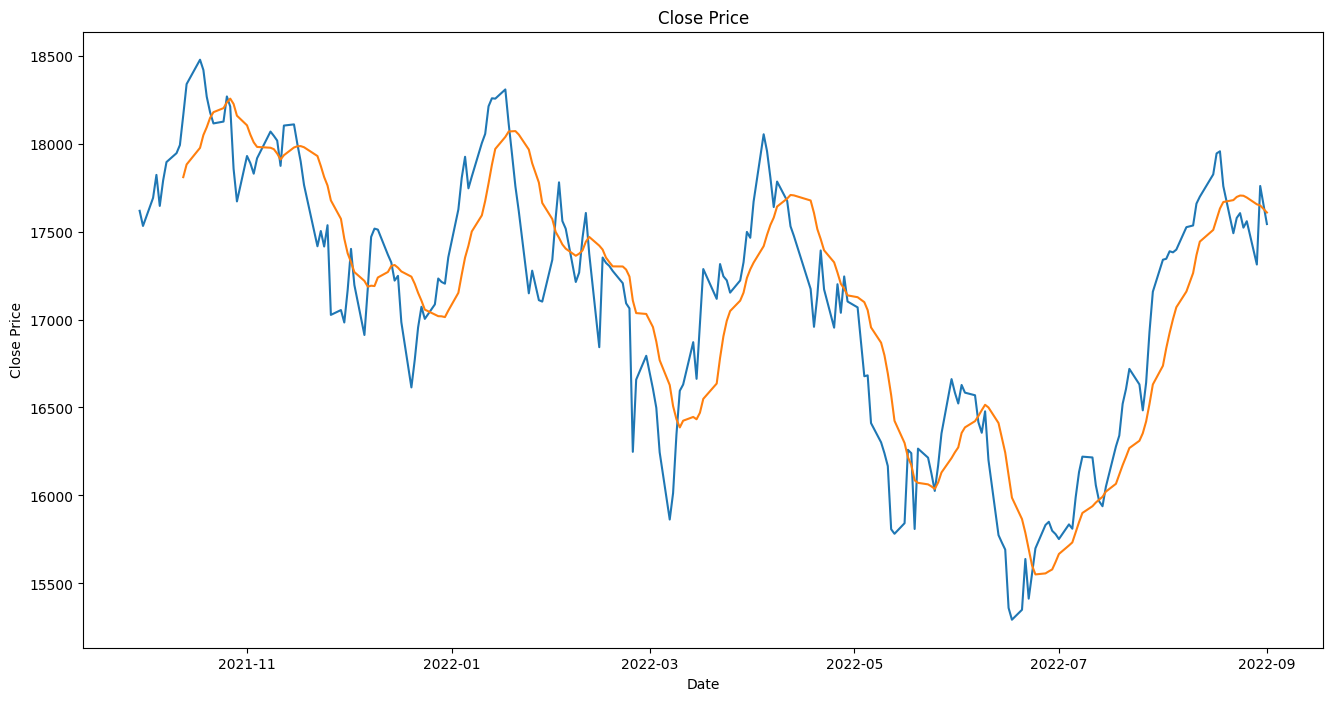

In [9]:
plt.figure(figsize=(16,8))
plt.title('Close Price')
plt.plot(data['Close'])
plt.plot(data['Moving Average'])
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

Enter Start Record (e.g => 228)
Enter End Record (e.g => 223)

It will print rising, falling and sideways of last 5 records of given range of candlestick...

In [12]:

rise = []
fall = []
    
flag = 0
    


record_number_start = int(input("Enter Start number"))
record_number_end = int(input("Enter End number"))

    
for i in range(record_number_start,record_number_end,-1):
        
    if data['Moving Average'][i] > data['Close'][i] and flag == 0:
        rise.append(data['Close'][i])
        fall.append(np.nan)
            
        
        flag = 1
        
        print("Rising")
            
    elif data['Moving Average'][i] < data['Close'][i] and flag == 1:
        fall.append(data['Close'][i])
        rise.append(np.nan)
        
        flag = 0
        
        print('Falling')
        
    else:
        # fall.append(np.nan)
        # rise.append(np.nan)
        
        print('Sideways')
            
        


Rising
Falling
Sideways


For all records Uptrend and Downtrend 

In [ ]:

def maRFS(data):
    rise = []
    fall = []
    sidew = []
    
    flag = 0
    
     
    
    
    for i in range(0,len(data)):
        
        if data['Moving Average'][i] > data['Close'][i] and flag == 0:
            rise.append(data['Close'][i])
            fall.append(np.nan)
            
            
            flag = 1
            
        elif data['Moving Average'][i] < data['Close'][i] and flag == 1: #and rise_price < data['Close'][i]:
            fall.append(data['Close'][i])
            rise.append(np.nan)
           
            flag = 0
        
        else:
            fall.append(np.nan)
            rise.append(np.nan)
            
        
    return (rise, fall)    
                    
            
            
                
            
        

In [ ]:
rfs = maRFS(data)

data['Rising']= rfs[0] 
data['Falling'] = rfs[1]


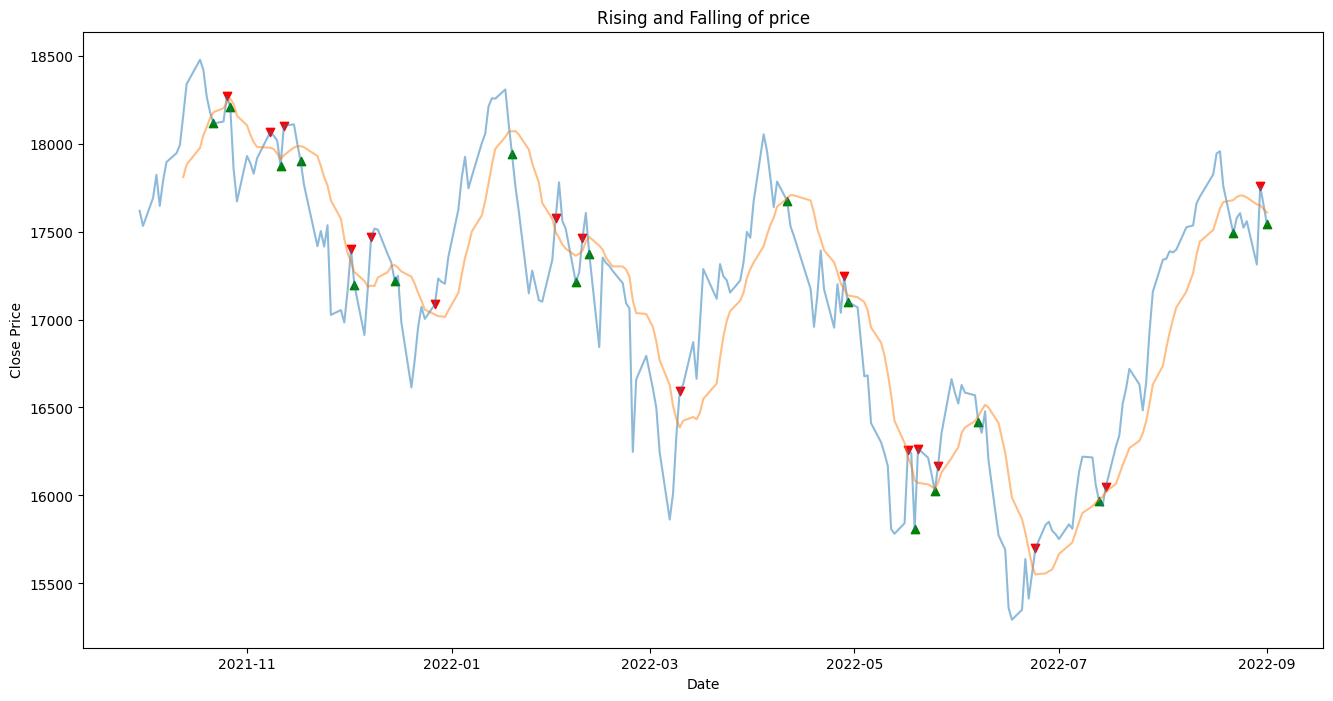

In [ ]:
from pyparsing import col


plt.figure(figsize=(16,8))
plt.title('Rising and Falling of price')
plt.plot(data['Close'], alpha = 0.5, label = 'Close')
plt.plot(data['Moving Average'], alpha = 0.5, label = 'Moving Average')
plt.scatter(data.index, data['Rising'], color = 'green', label = 'UpTrend', marker = '^', alpha = 1)
plt.scatter(data.index, data['Falling'], color = 'red', label = 'DownTrend', marker = 'v', alpha = 1)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

In [ ]:
data

,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr),Moving Average
2021-09-30,30-Sep-2021,17718.90,17742.15,17585.35,17618.15,378592721,27167.19,NaN
2021-10-01,01-Oct-2021,17531.90,17557.15,17452.90,17532.05,305763919,20911.61,NaN
2021-10-04,04-Oct-2021,17615.55,17750.90,17581.35,17691.25,295761839,21343.51,NaN
2021-10-05,05-Oct-2021,17661.35,17833.45,17640.90,17822.30,427000191,23066.80,NaN
2021-10-06,06-Oct-2021,17861.50,17884.60,17613.15,17646.00,395833550,24504.30,NaN
...,...,...,...,...,...,...,...,...
2022-08-25,25-Aug-2022,17679.00,17726.50,17487.45,17522.45,230181848,17566.70,17703.720
2022-08-26,26-Aug-2022,17619.30,17685.85,17519.35,17558.90,266636238,17500.80,17693.710
2022-08-29,29-Aug-2022,17188.65,17380.15,17166.20,17312.90,244854637,19351.50,17655.185
2022-08-30,30-Aug-2022,17414.95,17777.65,17401.50,17759.30,324687477,26284.26,17648.590
